#### Forward Euler solution of RC circuit for arbitrary stimulus current

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define cell parameters

In [2]:
# Cell parameters
Gm = 10*1e-9    # 10 nS, cell conductance 
Cm = 100*1e-12  # 100 pF, cell capacitance

Define the stimulation protocol

In [3]:
# Simulation parameters
Tend = 150*1e-3               # 150 ms, duration of simulation 
dt = 0.1*1e-3                 # 0.1 ms, time step 
Nt = round(Tend/dt)           # number of time steps    
t = np.arange(0, Tend+dt, dt) # create time vector

# Stimulus parameters for current step
t1 = 10*1e-3    # 10 ms, start of current pulse 
t2 = 80*1e-3    # 80 ms, end of current pulse 
amp = 10*1e-12  # 10 pA, amplitude of current pulse

# Create stimulus vector with current injection starting at time t1 and ending at time t2
Nt1 = round(t1/dt)+1
Nt2 = round(t2/dt)
Istim = np.zeros(Nt+1)  
Istim[Nt1:Nt2] = amp  # add current to stimulus vector

Initialize voltage and current vectors

In [4]:
# Create voltage and current vectors
Vm = np.zeros(Nt+1)
Vm[0] = 0             # initial voltage = zero
IC = np.zeros(Nt+1)    # capacitive current
IG = np.zeros(Nt+1)    # conductance current

Forward Euler solution for membrane voltage

In [5]:
for j in range(1,Nt):
  Vm[j+1] = Vm[j] + dt*(Istim[j+1] - Gm*Vm[j])/Cm

Calculate current vectors and convert units

In [6]:
IG = Gm*Vm      # calculate resistive current 
IC = Istim-IG   # calculate capacitive current

# convert units
t = t *1e3          # s to ms
Vm = Vm *1e3        # V to mV
Istim = Istim *1e12 # A to pA
IG = IG *1e12       # A to pA
IC = IC *1e12       # A to pA

Plot results

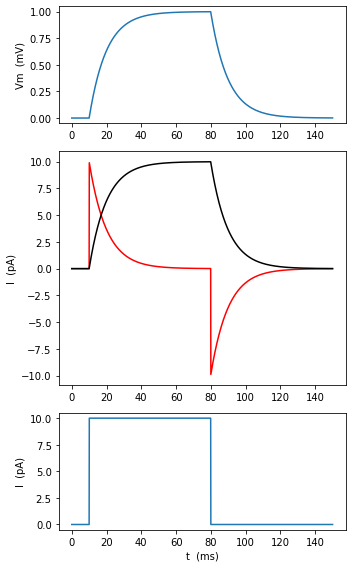

In [7]:
plt.rcParams['figure.figsize'] = [5, 8]
f, (a0, a1, a2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [2, 4, 2]})

a0.plot(t,Vm)
a0.set(ylabel='Vm  (mV)')

a1.plot(t,IC,'r',t,IG,'k')
a1.set(ylabel='I  (pA)')
a2.plot(t,Istim)
a2.set(xlabel='t  (ms)', ylabel='I  (pA)')

f.tight_layout()